# Timing

There are various ways to measure and control timing in PsychoPy:

-        using frame refresh periods (most accurate, least obvious)
-        checking the time on Clock objects
-        using core.wait() commands (most obvious, least flexible/accurate)

Using core.wait(), as in the above example, is clear and intuitive in your script. But it can’t be used while something is changing. For more flexible timing, you could use a Clock() object from the core module:

In [27]:
from psychopy import visual, core, logging

#setup stimulus
win=visual.Window([1920,1080], fullscr=False, allowGUI=True)

win.recordFrameIntervals = True

gabor = visual.GratingStim(win, tex='sin', mask='gauss', sf=5, name='gabor')
gabor.setAutoDraw(True)  # automatically draw every frame
gabor.autoLog=False#or we'll get many messages about phase change



clock = core.Clock()
#let's draw a stimulus for 2s, drifting for middle 0.5s
while clock.getTime() < 10.0:  # clock times are in seconds
    if 0.5 <= clock.getTime() < 6.0:
        gabor.setPhase(0.1, '+')  # increment by 10th of cycle

    #core.wait(0.510)
    win.flip()

win.refreshThreshold = 1/60 + 0.010

# Set the log module to report warnings to the standard output window
# (default is errors only).
logging.console.setLevel(logging.WARNING)

print('Overall, %i frames were dropped.' % win.nDroppedFrames)
    
    
win.close()

Overall, 14 frames were dropped.
2707.7725 	WARNING 	Monitor specification not found. Creating a temporary one...
2709.6021 	WARNING 	Couldn't measure a consistent frame rate.
  - Is your graphics card set to sync to vertical blank?
  - Are you running other processes on your computer?

2709.6255 	WARNING 	t of last frame was 23.58ms (=1/42)
2709.8911 	WARNING 	t of last frame was 21.41ms (=1/46)
2711.5909 	WARNING 	t of last frame was 20.96ms (=1/47)
2711.9401 	WARNING 	t of last frame was 20.19ms (=1/49)
2714.1231 	WARNING 	Multiple dropped frames have occurred - I'll stop bothering you about them!


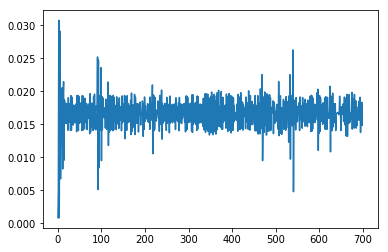

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(win.frameIntervals)
plt.show()



In [10]:
sum(win.frameIntervals)/len(win.frameIntervals)

0.016555283466974893

In [1]:
from psychopy import visual, core

#setup stimulus
win=visual.Window([400,400], fullscr=False, allowGUI=True)
gabor = visual.GratingStim(win, tex='sin', mask='gauss', sf=5,
    name='gabor', autoLog=False)
fixation = visual.GratingStim(win, tex=None, mask='gauss', sf=0, size=0.02,
    name='fixation', autoLog=False)

clock = core.Clock()
#let's draw a stimulus for 200 frames, drifting for frames 50:100
for frameN in range(200):#for exactly 200 frames
    if 10 <= frameN < 150:  # present fixation for a subset of frames
        fixation.draw()
    if 50 <= frameN < 100:  # present stim for a different subset
        gabor.setPhase(0.1, '+')  # increment by 10th of cycle
        gabor.draw()
    win.flip()
    print(frameN)
win.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.6539 	WARNING 	Monitor specification not found. Creating a temporary one...


In [2]:
from __future__ import division, print_function

from psychopy import visual, logging
win = visual.Window([800,600], fullscr=False, allowGUI=True)


# By default, the threshold is set to 120% of the estimated refresh
# duration, but arbitrary values can be set.
#
# I've got 85Hz monitor and want to allow 4 ms tolerance; any refresh that
# takes longer than the specified period will be considered a "dropped"
# frame and increase the count of win.nDroppedFrames.


Overall, 0 frames were dropped.


In [3]:
win.close()

221.4112 	WARNING 	Monitor specification not found. Creating a temporary one...
